In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
import tensorflow as tf


%matplotlib inline

In [2]:
valid = pd.read_csv("final_result/valid_250_epoch.csv").rename(columns = {"Unnamed: 0" : "acc_id"}).fillna(0)

print(len(valid))
valid.head()

20000


,acc_id,week-tree,month-tree,2month-tree,retained-tree,retained-week-tree,retained-month-tree,retained-2month-tree,retained-2month-week_month-tree,retained-week-month_2month-tree,...,week-2month-tree,week-retained-tree,week-retained-month_2month-tree,week-month-2month_retained-tree,week-2month-month_retained-tree,total_week,total_month,total_2month,total_retained,label
0,cce8cf742d779df73ac7d13effb2fe76cf06cc8c4fb6ee...,1.509710e-02,0.889619,8.607723e-03,0.020867,0.058788,0.942421,0.000255,0.930623,1.152129e-07,...,0.003331,0.021363,0.000002,0.000000,0.051316,1.031506e-01,0.879038,4.910580e-03,0.012901,1
1,cce8f7a34235ec6c08b13e41afcafb667c8a0f63dc429f...,0.000000e+00,0.000000,1.066952e-08,0.999995,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.324211e-25,0.000005,6.628296e-17,0.999995,3
2,cce9bf6a13008fc11ecdc2c855ff844e869eceeda22ebc...,5.917798e-01,0.022067,5.577732e-02,0.009783,0.683343,0.084129,0.008913,0.092162,5.637858e-01,...,0.077653,0.075693,0.202722,0.108016,0.149553,5.826866e-01,0.232607,8.504402e-02,0.099663,0
3,ccebea3ff3a74ae9c9ce4a15e2f80f8a336ae1a0ba3e53...,1.536979e-35,0.000056,3.578402e-01,0.883604,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.459865,0.579961,0.766740,0.934080,0.999996,2.790499e-07,0.018602,3.068831e-01,0.674514,2
4,ccec4f896d13bdcbf2279760bda2bbd7b4bdac229761f9...,5.100701e-25,0.013531,2.349116e-05,0.928284,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000002,0.904302,0.000000,0.999896,0.998422,1.475391e-11,0.001142,8.480202e-03,0.990378,3


In [3]:
test = pd.read_csv("final_result/test_250_epoch.csv").rename(columns = {"Unnamed: 0" : "acc_id"}).fillna(0)

print(len(test))
test.head()

40000


,acc_id,week-tree,month-tree,2month-tree,retained-tree,retained-week-tree,retained-month-tree,retained-2month-tree,retained-2month-week_month-tree,retained-week-month_2month-tree,...,week-month-tree,week-2month-tree,week-retained-tree,week-retained-month_2month-tree,week-month-2month_retained-tree,week-2month-month_retained-tree,total_week,total_month,total_2month,total_retained
0,0002a56a036206aea3a6c6ebc985df4a2d1987b562e7f0...,1.282105e-18,0.287728,7.576508e-01,0.000014,8.865926e-10,0.335192,0.289518,1.0,0.714316,...,0.367014,0.343396,0.000370,0.778505,0.001731,0.010793,2.567430e-09,0.559539,0.438544,0.001917
1,0003bfdebe2b5d46217e8fa5ab0f33cf186fb558435f20...,1.116987e-09,0.011985,5.927302e-12,0.001180,9.999859e-01,0.177245,0.998754,0.0,0.000000,...,0.728745,0.037440,0.955744,0.000000,0.000000,0.687728,6.980182e-03,0.970919,0.011460,0.010641
2,0008f5dce798aaac3f0b05f8a4269cf2052c9b8c5bd911...,3.464303e-08,0.219554,7.482451e-01,0.007912,2.858964e-05,0.281202,0.780203,0.0,0.730266,...,0.261161,0.708864,0.006113,0.701051,0.007394,0.000000,1.117059e-04,0.297933,0.692900,0.009055
3,000cacd86bddabebef813351455304df5493cd71a3d1d2...,1.226835e-07,0.244845,7.135513e-01,0.051405,4.137673e-04,0.343690,0.738547,0.0,0.734775,...,0.226864,0.735483,0.067612,0.768146,0.055259,0.000000,1.238303e-03,0.233987,0.716136,0.048639
4,000ef0765596ac6a6a0a62654895e4673825b6102c7f41...,1.003806e-08,0.275327,3.624003e-01,0.614117,3.040017e-04,0.428519,0.391759,1.0,0.585624,...,0.065011,0.333975,0.439294,0.506607,0.457827,0.540175,1.059176e-05,0.370309,0.351657,0.278023


In [4]:
features =  ['week-tree', 'total_week', 'retained-week-tree',
             'month-tree', "total_month", 'retained-month-tree', 'retained-2month-week_month-tree', 'week-month-tree',
             '2month-tree', "total_2month", 'retained-2month-tree', 'retained-week-month_2month-tree', 'retained-month-week_2month-tree', 'week-2month-tree', 'week-retained-month_2month-tree', 
             'retained-tree', "total_retained",'week-retained-tree', 'week-month-2month_retained-tree', 'week-2month-month_retained-tree']

target = "label"

In [ ]:
"""
valid F1 score : 0.835019533206
valid F1 score : 0.511169513798
valid F1 score : 0.624146637987
valid F1 score : 0.759031198686
valid F1 score : 0.857057237039
valid F1 score : 0.559139784946
valid F1 score : 0.721834139352
valid F1 score : 0.882810071495
valid F1 score : 0.74330571304
valid F1 score : 0.930932160033
valid F1 score : 0.604991177212
valid F1 score : 0.628211250119
valid F1 score : 0.776022020593
valid F1 score : 0.747978788142
valid F1 score : 0.829327654396
valid F1 score : 0.873835053613
"""

<br></br><br></br><br></br> 

In [40]:
def my_f1_score(solution, submission):
    a=pd.DataFrame(submission,columns=['Y_hat'])
    b=pd.DataFrame(solution.tolist(),columns=['Y'])
    c=pd.concat([a,b],axis=1)
    
    tot_table=c.groupby(['Y','Y_hat']).Y_hat.count().unstack()
    accuracy=np.sum(np.diag(np.array(tot_table)))/len(c)
     
    f1_score=1/(np.mean(np.concatenate([1/np.diag(tot_table/tot_table.sum(axis=0)),1/np.diag(tot_table/tot_table.sum(axis=1))])))
    print('final accuracy:%s'%(accuracy))    
    print('final_f1_score:%s'%(f1_score))   
    print()
    
    return f1_score 

my_scorer = make_scorer(my_f1_score, greater_is_better = True)

In [41]:
idx = 16000

xgb = XGBClassifier(n_estimators=200)
xgb_grid = GridSearchCV(xgb, param_grid={}, scoring=my_scorer, cv=5, verbose=1)

xgb_grid.fit(valid[:idx][features], valid[:idx][target])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
final accuracy:0.243285446596
final_f1_score:0.242071165155

final accuracy:0.475464916393
final_f1_score:0.47548182803

final accuracy:0.255465334166
final_f1_score:0.253675178585

final accuracy:0.465775902485
final_f1_score:0.465728430259

final accuracy:0.254375
final_f1_score:0.25270023719

final accuracy:0.480703125
final_f1_score:0.480143215552

final accuracy:0.253595997498
final_f1_score:0.252760703255

final accuracy:0.469067333229
final_f1_score:0.468955652912

final accuracy:0.243902439024
final_f1_score:0.24382817282

final accuracy:0.482346508358
final_f1_score:0.48231899172



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(my_f1_score), verbose=1)

 <br></br>

In [6]:
def my_f1_score2(solution, submission):
    a=pd.DataFrame(submission,columns=['Y_hat'])
    b=pd.DataFrame(solution,columns=['Y'])
    c=pd.concat([a,b],axis=1)
    
    tot_table=c.groupby(['Y','Y_hat']).Y_hat.count().unstack()
    accuracy=np.sum(np.diag(np.array(tot_table)))/len(c)
     
    f1_score=1/(np.mean(np.concatenate([1/np.diag(tot_table/tot_table.sum(axis=0)),1/np.diag(tot_table/tot_table.sum(axis=1))])))
    return f1_score 

In [52]:
values = valid[features].values
max_score = 0

for idx0 in range(1,6) :
    temp = 500-idx0
    print()
    print("----",idx0,"----")
    
    for idx1 in range(1,6) :
        temp -= idx1
        
        for idx2 in range(3) :
            temp -= idx2
            
            for idx3 in range(1,6) :
                temp -= idx3
                
                for idx4 in range(1,6) :
                    temp -= idx4
                    
                    for idx5 in range(3) :
                        temp -= idx5
                        
                        for idx6 in range(3) :
                            temp -= idx6
                            
                            for idx7 in range(3) :
                                temp -= idx7
                                
                                for idx8 in range(1,6) :
                                    temp -= idx8
                                    
                                    for idx9 in range(1,6) :
                                        temp -= idx9
                                        
                                        for idx10 in range(3) :
                                            temp -= idx10
                                            
                                            for idx11 in range(3) :
                                                temp -= idx11
                                                
                                                for idx12 in range(3) :
                                                    temp -= idx12
                                                    
                                                    for idx13 in range(3) :
                                                        temp -= idx13
                                                        
                                                        for idx14 in range(3) :
                                                            temp -= idx14
                                                            
                                                            for idx15 in range(1,6) :
                                                                temp -= idx15
                                                                
                                                                for idx16 in range(1,6) :
                                                                    temp -= idx16
                                                                    
                                                                    for idx17 in range(3) :
                                                                        temp -= idx17
                                                                        
                                                                        for idx18 in range(3) :
                                                                            temp -= idx18
                                                                            
                                                                            for idx19 in range(3) :
                                                                                week_1 = values[:,[0,1,2]]
                                                                                week_2 = 1-values[:,[3,4,5,6,8,9,10,12,15,16]]
                                                                                week_weight_1 = np.array([eval("idx{}".format(i)) for i in range(20) if i in [0,1,2]])
                                                                                week_weight_2 = np.array([6,6,3,3,6,6,3,3,6,6])-np.array([eval("idx{}".format(i)) for i in range(20) if i in [3,4,5,6,8,9,10,12,15,16]])
                                                                                
                                                                                month_1 = values[:,[3,4,5,6,7]]
                                                                                month_2 = 1-values[:,[0,1,2,8,9,10,11,13,14,15,16,17,19]]
                                                                                month_weight_1 = np.array([eval("idx{}".format(i)) for i in range(20) if i in [3,4,5,6,7]])
                                                                                month_weight_2 = np.array([3,3,3,6,6,3,3,3,3,6,6,3,3])-np.array([eval("idx{}".format(i)) for i in range(20) if i in [0,1,2,8,9,10,11,13,14,15,16,17,19]])
                                                                                
                                                                                month2_1 = values[:,[8,9,10,11,12,13,14]]
                                                                                month2_2 = 1-values[:,[0,1,2,3,4,5,7,15,16,17,18]]
                                                                                month2_weight_1 = np.array([eval("idx{}".format(i)) for i in range(20) if i in [8,9,10,11,12,13,14]])
                                                                                month2_weight_2 = np.array([6,6,3,6,6,3,3,6,6,3,3])-np.array([eval("idx{}".format(i)) for i in range(20) if i in [0,1,2,3,4,5,7,15,16,17,18]])
                                                                                
                                                                                retained_1 = values[:,[15,16,17,18,19]]
                                                                                retained_2 = 1-values[:,[0,1,3,4,7,8,9,13]]
                                                                                retained_weight_1 = np.array([eval("idx{}".format(i)) for i in range(20) if i in [15,16,17,18,19]])
                                                                                retained_weight_2 = np.array([6,6,3,3,3,6,6,3])-np.array([eval("idx{}".format(i)) for i in range(20) if i in [0,1,3,4,7,8,9,13]])
                                                                                
                                                                                week = (np.sum(week_1*week_weight_1, axis=1) + np.sum(week_2*week_weight_2, axis=1)) / (np.sum(week_weight_1) + np.sum(week_weight_2))
                                                                                month = (np.sum(month_1*month_weight_1, axis=1) + np.sum(month_2*month_weight_2, axis=1)) / (np.sum(month_weight_1) + np.sum(month_weight_2))
                                                                                month2 = (np.sum(month2_1*month2_weight_1, axis=1) + np.sum(month2_2*month2_weight_2, axis=1)) / (np.sum(month2_weight_1) + np.sum(month2_weight_2))
                                                                                retained = (np.sum(retained_1*retained_weight_1, axis=1) + np.sum(retained_2*retained_weight_2, axis=1)) / (np.sum(retained_weight_1) + np.sum(retained_weight_2))
                                                                                
                                                                                result = np.concatenate([week.reshape([-1,1]), month.reshape([-1,1]), month2.reshape([-1,1]), retained.reshape([-1,1])], axis=1)
                                                                                result_label = np.argmax(result, axis=1)
                                                                                
                                                                                score = my_f1_score2(result_label,valid[target].tolist())
                                                                                
                                                                                if score > max_score :
                                                                                    max_score = score
                                                                                    max_weight = np.array([eval("idx{}".format(i)) for i in range(20)])
                                                                                    print(max_score, max_weight)
                                        
    


---- 1 ----
0.683098272592 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0]
0.684418244763 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1]
0.685108969477 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 2]
0.6855744701 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 2]
0.685642301194 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 2 0]
0.685755238801 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 2 1]
0.686620713619 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 2 0]
0.686653783502 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 2 1 1 2 0]
0.68667726168 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 2 2 0 2 0]
0.686738642214 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 3 1 0 2 0]
0.687083521777 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 2 1]
0.687301332051 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 2 2]
0.68750118393 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 2 0 1 1]
0.687506581457 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 2 1 1 1]
0.687506872481 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 3 1 0 0]
0.687585731073 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 4 0 1 0]
0.687691040691 [1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 4 0 1 1]
0.688101900405 [1 1 0 

KeyboardInterrupt: 

<br></br>

In [5]:
def one_hot(lst, num_class=4) :
    return np.eye(num_class)[lst]

In [6]:
def my_f1_score2(solution, submission):
    a=pd.DataFrame(submission,columns=['Y_hat'])
    b=pd.DataFrame(solution,columns=['Y'])
    c=pd.concat([a,b],axis=1)
    
    tot_table=c.groupby(['Y','Y_hat']).Y_hat.count().unstack()
    accuracy=np.sum(np.diag(np.array(tot_table)))/len(c)
     
    f1_score=1/(np.mean(np.concatenate([1/np.diag(tot_table/tot_table.sum(axis=0)),1/np.diag(tot_table/tot_table.sum(axis=1))])))
    return f1_score 

In [34]:
def my_f1_table(solution, submission):
    a=pd.DataFrame(submission,columns=['Y_hat'])
    b=pd.DataFrame(solution,columns=['Y'])
    c=pd.concat([a,b],axis=1)
    
    tot_table=c.groupby(['Y','Y_hat']).Y_hat.count().unstack()
    return tot_table

In [112]:
class Weight() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        
    def convolution(self, input_X, kernel_size, width, num_filter, activation=True) :
        conv = tf.layers.conv2d(input_X, filters=num_filter, kernel_size=[kernel_size, width], strides=1)
        
        if activation :
            norm = tf.contrib.layers.layer_norm(conv)
            relu = tf.nn.relu(norm)
        
            return relu
        return conv
        
    def build(self, batch_size, input_dim, is_fc, fc_num_unit, output_dim) :
        with tf.variable_scope(self.name) :
            
            ## Setting ##
            self.batch_size = batch_size
            self.input_dim = input_dim
            self.output_dim = output_dim
            self.is_fc = is_fc
            self.fc_num_unit = fc_num_unit
            
            self.X = tf.placeholder(tf.float32, [None, self.input_dim])
            self.Y = tf.placeholder(tf.float32, [None, self.output_dim])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            #############

            
            ## Weight ##
            if self.is_fc : 
                self.fc_weight1 = tf.Variable(tf.random_normal([self.input_dim, self.fc_num_unit]))
                self.fc_weight2 = tf.Variable(tf.random_normal([self.fc_num_unit, self.output_dim]))
                
                self.fc_weighted1 = tf.matmul(self.X, self.fc_weight1)
                norm = tf.contrib.layers.layer_norm(self.fc_weighted1)
                relu = tf.nn.relu(norm)
                self.fc_weighted2 = tf.matmul(relu, self.fc_weight2)
                
                self.weighted =  self.fc_weighted2
                
            else :
                self.weight = tf.Variable(tf.random_normal([self.input_dim, self.output_dim]))
                self.weighted = tf.matmul(self.X, self.weight)
            
            self.logit = self.weighted
            self.softmax = tf.nn.softmax(self.logit)
            ################
            
            
            ## Learning ##
            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logit, labels=self.Y))

            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.RMSPropOptimizer(learning_rate=self.learning_rate).minimize(self.cost)
            
            self.prediction = tf.equal(tf.argmax(self.logit, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(self.prediction, tf.float32))    
            ##############
        
        
    def train(self, X_input, Y_input, learning_rate, training=True):
        feed_dict = {self.X: X_input, self.Y: Y_input, self.learning_rate: learning_rate, self.training: training}
        _, cost = self.sess.run([self.optimizer, self.cost], feed_dict=feed_dict)
        
        return _, cost
    
    def predict(self, X_input, training=False):
        feed_dict = {self.X: X_input, self.training: training}
        result = self.sess.run([self.logit], feed_dict=feed_dict)
            
        return result
    
    def evaluate(self, X_input, Y_input):
        size = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for idx in range(0, size, self.batch_size):
            X_batch = X_input[idx:idx + batch_size]
            Y_batch = Y_input[idx:idx + batch_size]
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= size
        total_acc /= size
            
        return total_loss, total_acc

In [113]:
tf.reset_default_graph() 

In [114]:
learning_rate1 = 0.01
learning_rate2 = 0.005
learning_rate3 = 0.001

total_epoch = 40
batch_size = 500

tl_ta_vl_va_lst = [[[],[],[],[],[]], [[],[],[],[],[]]]

In [115]:
sess1 = tf.Session()
model1 = Weight(sess1, "model1")
model1.build(500, 20, True, 32, 4)
sess1.run(tf.global_variables_initializer())

sess2 = tf.Session()
model2 = Weight(sess2, "model2")
model2.build(500, 20, False, 32, 4)
sess2.run(tf.global_variables_initializer())

model_lst = [model1, model2]
print("Ready!")

Ready!


In [116]:
idx = 16000

training_lst = valid[:idx][features].values
valid_lst = valid[idx:][features].values

training_label = one_hot(valid[:idx]["label"])
valid_label = one_hot(valid[idx:]["label"])

In [117]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost = [0]*len(model_lst)
    total_batch = int(len(training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 10 :
        learning_rate = learning_rate2
    elif epoch == 25 :
        learning_rate = learning_rate3

    for i in range(total_batch):
        batch_xs, batch_ys = training_lst[idx:idx+batch_size],training_label[idx:idx+batch_size]
        
        for model_num, model in enumerate(model_lst) :
            _, c = model.train(batch_xs, batch_ys, learning_rate)
            avg_cost[model_num] += c / total_batch
        
        idx += batch_size
        if i%10 == 0 :
            print("log :", i)
            
    #train/valid cost & acc
    print("***epoch*** : ", epoch)
    for model_num, model in enumerate(model_lst) :
        train_cost, train_acc = model.evaluate(training_lst, training_label)
        valid_cost, valid_acc = model.evaluate(valid_lst, valid_label)

        tl_ta_vl_va_lst[model_num][0].append(train_cost)
        tl_ta_vl_va_lst[model_num][1].append(train_acc)
        tl_ta_vl_va_lst[model_num][2].append(valid_cost)
        tl_ta_vl_va_lst[model_num][3].append(valid_acc)

        print("-- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(train_cost, train_acc*100, valid_cost, valid_acc*100))
    
    for model_num, model in enumerate(model_lst) :
        f1_score = my_f1_score2(np.argmax(model.predict(valid_lst)[0], axis=1), np.argmax(valid_label, axis=1))
        tl_ta_vl_va_lst[model_num][4].append(f1_score)
        print('f1 score:', f1_score)
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

log : 0
log : 10
log : 20
log : 30
***epoch*** :  0
-- train 1.11386(67.7%), valid1.09035(69.2%)
-- train 1.94959(58.7%), valid1.99763(58.1%)
f1 score: 0.674376464919
f1 score: nan
 
log : 0
log : 10
log : 20
log : 30
***epoch*** :  1
-- train 0.84879(69.5%), valid0.82987(70.4%)
-- train 1.23798(60.0%), valid1.25950(59.3%)
f1 score: 0.68292113369
f1 score: 0.0931404774127
 
log : 0
log : 10
log : 20
log : 30
***epoch*** :  2
-- train 0.75714(70.2%), valid0.73995(71.4%)
-- train 0.84707(68.3%), valid0.84183(68.8%)
f1 score: 0.686880967627
f1 score: 0.667619484282
 
log : 0
log : 10
log : 20
log : 30
***epoch*** :  3
-- train 0.71581(71.1%), valid0.70170(72.5%)
-- train 0.77975(69.7%), valid0.76721(70.7%)
f1 score: 0.696055258602
f1 score: 0.688986428604
 
log : 0
log : 10
log : 20
log : 30
***epoch*** :  4
-- train 0.69876(71.6%), valid0.68776(72.7%)
-- train 0.74499(70.2%), valid0.73136(71.2%)
f1 score: 0.698329362653
f1 score: 0.693052305342
 
log : 0
log : 10
log :

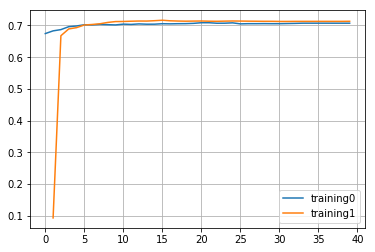

In [118]:
for idx in range(len(model_lst)) :
    plt.plot(tl_ta_vl_va_lst[idx][4], label='training'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

In [119]:
print(my_f1_score2(np.argmax(valid[16000:][["total_week", "total_month", "total_2month", "total_retained"]].values, axis=1), np.argmax(valid_label, axis=1)))
my_f1_table(np.argmax(valid[16000:][["total_week", "total_month", "total_2month", "total_retained"]].values, axis=1), np.argmax(valid_label, axis=1))

0.68066734716


Y_hat,0,1,2,3
Y,,,,
0,870,103,64,55
1,71,449,101,56
2,21,338,738,160
3,33,58,124,759


In [120]:
print(my_f1_score2(np.argmax(model_lst[0].predict(valid_lst)[0], axis=1), np.argmax(valid_label, axis=1)))
my_f1_table(np.argmax(model_lst[0].predict(valid_lst)[0], axis=1), np.argmax(valid_label, axis=1))

0.707133200878


Y_hat,0,1,2,3
Y,,,,
0,873,97,57,43
1,57,452,77,37
2,15,327,766,116
3,50,72,127,834


In [121]:
print(my_f1_score2(np.argmax(model_lst[1].predict(valid_lst)[0], axis=1), np.argmax(valid_label, axis=1)))
my_f1_table(np.argmax(model_lst[1].predict(valid_lst)[0], axis=1), np.argmax(valid_label, axis=1))

0.713125375181


Y_hat,0,1,2,3
Y,,,,
0,881,78,35,38
1,62,487,115,50
2,16,324,767,140
3,36,59,110,802


In [122]:
model = model_lst[0]
pred1 = model.sess.run(model.softmax, feed_dict = {model.X : valid_lst, model.training:False})
pred1_df = pd.DataFrame(pred1, columns = ["model0_week", "model0_month", "model0_2month", "model0_retained"])

pred1_df.head()

,model0_week,model0_month,model0_2month,model0_retained
0,0.958011,0.031204,0.006212,0.004573
1,0.004420,0.094016,0.058178,0.843386
2,0.007087,0.360226,0.497244,0.135444
3,0.561752,0.388947,0.031038,0.018263
4,0.104241,0.142380,0.121338,0.632041


In [123]:
model = model_lst[1]
pred2 = model.sess.run(model.softmax, feed_dict = {model.X : valid_lst, model.training:False})
pred2_df = pd.DataFrame(pred2, columns = ["model1_week", "model1_month", "model1_2month", "model1_retained"])

pred2_df.head()

,model1_week,model1_month,model1_2month,model1_retained
0,0.930415,0.041871,0.014128,0.013586
1,0.029266,0.272544,0.187970,0.510219
2,0.009392,0.361102,0.527034,0.102472
3,0.590559,0.357585,0.030826,0.021030
4,0.065255,0.102617,0.083664,0.748463


In [124]:
pred_df = pd.concat([pred1_df, pred2_df], axis=1)
pred_df.head()

,model0_week,model0_month,model0_2month,model0_retained,model1_week,model1_month,model1_2month,model1_retained
0,0.958011,0.031204,0.006212,0.004573,0.930415,0.041871,0.014128,0.013586
1,0.004420,0.094016,0.058178,0.843386,0.029266,0.272544,0.187970,0.510219
2,0.007087,0.360226,0.497244,0.135444,0.009392,0.361102,0.527034,0.102472
3,0.561752,0.388947,0.031038,0.018263,0.590559,0.357585,0.030826,0.021030
4,0.104241,0.142380,0.121338,0.632041,0.065255,0.102617,0.083664,0.748463


In [127]:
best_weight = []
best_f1 = 0

for idx0 in range(0, 31)  :
    print()
    print("-------",idx0,"-------")
    
    for idx1 in range(0, 31)  :
        for idx2 in range(0, 31)  :
            for idx3 in range(0, 31)  :
                pred_df["week"] = (idx0*pred_df["model0_week"] + (30-idx0)*pred_df["model1_week"]) / 30
                pred_df["month"] = (idx1*pred_df["model0_month"] + (30-idx1)*pred_df["model1_month"]) / 30
                pred_df["2month"] = (idx2*pred_df["model0_2month"] + (30-idx2)*pred_df["model1_2month"]) / 30
                pred_df["retained"] = (idx3*pred_df["model0_retained"] + (30-idx3)*pred_df["model1_retained"]) / 30
                
                f1 = my_f1_score2(np.argmax(pred_df[["week", "month", "2month", "retained"]].values, axis=1), np.argmax(valid_label, axis=1))
                if f1 > best_f1 :
                    best_f1 = f1
                    best_weight = [idx0, idx1, idx2, idx3]
                    print(best_f1, best_weight)


------- 0 -------
0.713125375181 [0, 0, 0, 0]
0.713490495877 [0, 0, 0, 1]
0.713691494437 [0, 0, 0, 8]
0.713948125635 [0, 0, 0, 9]
0.713962462697 [0, 0, 0, 11]
0.714014542681 [0, 0, 0, 12]
0.714118530099 [0, 0, 0, 17]
0.714454444137 [0, 0, 0, 22]
0.714459634557 [0, 0, 0, 27]
0.714706197933 [0, 0, 0, 28]
0.714910726613 [0, 0, 0, 29]
0.715061937212 [0, 0, 1, 27]
0.715308445855 [0, 0, 1, 28]
0.715340054113 [0, 0, 3, 28]
0.715538605493 [0, 0, 3, 30]
0.715591881751 [0, 0, 4, 28]
0.715796128484 [0, 0, 4, 29]
0.715945494247 [0, 0, 6, 30]
0.716042855151 [0, 0, 7, 28]
0.716241113731 [0, 0, 7, 30]
0.716289331373 [0, 0, 8, 23]
0.716488579974 [0, 0, 8, 27]
0.716735749154 [0, 0, 8, 28]
0.716934391671 [0, 0, 8, 30]
0.717025258856 [0, 0, 11, 28]
0.717229589981 [0, 0, 11, 30]
0.717421757338 [0, 0, 12, 29]
0.717506293204 [0, 1, 11, 30]
0.717515094559 [0, 1, 15, 30]
0.717563991892 [0, 2, 14, 30]
0.717578041323 [0, 3, 19, 30]
0.717644319224 [0, 5, 12, 29]
0.717678120994 [0, 8, 16, 9]
0.717881722998 [0, 8